<!-- Título principal -->
<p align="center" style="font-size:40px; font-weight:bold;">
  Computational Learning and Deep Learning
</p>
<p align="center" style="font-size:30px;">
Death prediction of the critical care unit patients
</p>
<!-- Subtítulo de la escuela -->
<p align="center" style="font-size:30px;">
  Barcelona School of Economics
</p>

<!-- Nombre del curso -->
<p align="center" style="font-size:25px;">
  Data Science for Decision Making
</p>

<!-- Lista de miembros -->
<p align="center" style="font-size:20px;">
  <b></b>
</p>

<p align="center" style="font-size:18px;">
  - Maria Simakova
  
</p>

# Initial settings

### Importing libraries

In [53]:
# Needed libraries
import matplotlib.pylab as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

#For prediction 
#ensemble models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier



# For categorical variables
#pip install category_encoders

### Helper functions 

These functions are imported from the "helper_function.py" file you shared with us in Google Drive

In [54]:
from matplotlib import colors
def plot_confusion_matrix(cm, class_labels):
    """Pretty prints a confusion matrix as a figure

    Args:
        cm:  A confusion matrix for example
        [[245, 5 ],
         [ 34, 245]]

        class_labels: The list of class labels to be plotted on x-y axis

    Rerturns:
        Just plots the confusion matrix.
    """

    df_cm = pd.DataFrame(cm, index = [i for i in class_labels],
                  columns = [i for i in class_labels])
    sns.set(font_scale=1)
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel("Predicted label")
    plt.ylabel("Real label")
    plt.show()



def plot_any_cat_matrix(dat,Yvar,Xvar, width=10, height=10):
    """Pretty prints a categorical matrix of counts as a figure

    Args:
        dat:  A data frame, each row is an observation, and has more than one categorical feature
        Yvar: Categorical variable name, should exist in dat
        Xvar: Categorical variable name, should exist in dat


    Rerturns:
        Just plots the occurence matrix.
    """

    aux=dat[[Xvar,Yvar]].groupby([Xvar,Yvar]).size()
    aux=pd.DataFrame(aux)
    aux.reset_index(level=0, inplace=True)
    aux.reset_index(level=0, inplace=True)
    aux

    counts= aux.pivot_table(index=Yvar, columns=Xvar,fill_value=0)
    counts.columns= counts.columns.droplevel( level=0)

    fig, ax = plt.subplots(figsize=(width,height))
    sns.set(font_scale=0.7)
    sns.heatmap(counts, annot=True, fmt='g', cmap='Blues', ax=ax)
    plt.xlabel(Xvar)
    plt.ylabel(Yvar)
    plt.show()



from sklearn.metrics import roc_curve, roc_auc_score
def get_auc(y, y_pred_probabilities, class_labels, column =1, plot = True):
    """Plots ROC AUC
    """
    fpr, tpr, _ = roc_curve(y == column, y_pred_probabilities[:,column],drop_intermediate = False)
    roc_auc = roc_auc_score(y_true=y, y_score=y_pred_probabilities[:,1])
    print ("AUC: ", roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

import random
def plot_digits_sample(images, target, labels = None):
    # The data that we are interested in is made of 8x8 images of digits, let's
    # have a look at the first images, stored in the `images` attribute of the
    # dataset.  If we were working from image files, we could load them using
    # matplotlib.pyplot.imread.  Note that each image must have the same size. For these
    # images, we know which digit they represent: it is given in the 'target' of
    # the dataset.


    fig, axes = plt.subplots(5, 5, figsize=(5, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        im = random.randint(0, len(images)-1)
        ax.imshow(images[im].reshape([8,8]), cmap=plt.cm.gray_r, interpolation='nearest')
        ax.text(0.05, 0.05, str(target[im]),
                transform=ax.transAxes, color='green')

    plt.show()

def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          table=True,
                          display_all_params=True):

    '''Display grid search results
    modified from https://www.kaggle.com/grfiv4/displaying-the-results-of-a-grid-search
    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    table              boolean: should a table be produced?
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_


    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
    scores_df = scores_df[scores_df.columns.drop(list(scores_df.filter(regex='time')))] #drop time parameters

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    if table:
        display(scores_df \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

# Data

**Training/Test dataset variables**:
- Target variable: `HOSPITAL_EXPIRE_FLAG` Binary variable, 1 if the patient died and 0 otherwise. 
- Identification variables: 
    - Patient ID: `subject_id`
    - Hospital stay ID: `hadm_id`
    - ICU ID: `icustay_id`
- Medical indicators: `HeartRate_Min`, `HeartRate_Max`, `HeartRate_Mean`,
       `SysBP_Min`, `SysBP_Max`, `SysBP_Mean`, `DiasBP_Min`, `DiasBP_Max`,
       `DiasBP_Mean`, `MeanBP_Min`, `MeanBP_Max`, `MeanBP_Mean`,
       `RespRate_Min`, `RespRate_Max`, `RespRate_Mean`, `TempC_Min`,
       `TempC_Max`, `TempC_Mean`, `SpO2_Min`, `SpO2_Max`, `SpO2_Mean`,
       `Glucose_Min`, `Glucose_Max`, `Glucose_Mean`.
- Personal characteristics: `GENDER`, `DOB`, `DOD`,`INSURANCE`, `RELIGION`, `MARITAL_STATUS`, `ETHNICITY`.
- Hospital data: `ADMITTIME`, `DISCHTIME`, `DEATHTIME`, `Diff`, `ADMISSION_TYPE`, `DIAGNOSIS`,`ICD9_diagnosis`, `FIRST_CAREUNIT`, `LOS`.

**Diagnoses data**
Provides information about other diagnosed health conditions `ICD9_CODE` a patient might have (comorbidities), as the variable `ICD9_diagnosis`accounts for only the main diagnostic of that patient. But there might be other important co-occurrent diseases that influence patients state. 

In [55]:
#Train dataset
df_train=pd.read_csv('/Users/masha/Desktop/master/2_trim/deep_learning/cmldl-bse-2425-svm/mimic_train.csv')
df_test=pd.read_csv('/Users/masha/Desktop/master/2_trim/deep_learning/cmldl-bse-2425-svm/mimic_X_test.csv')
df_diagnoses=pd.read_csv('/Users/masha/Desktop/master/2_trim/deep_learning/cmldl-bse-2425-svm/MIMIC_diagnoses.csv')

In [56]:
df_train.head()

,Unnamed: 0,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,...,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,6.1397
1,15798,0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,...,-56421.13544,EMERGENCY,Private,EPISCOPALIAN,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,10.2897
2,2129,0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,...,-60754.35504,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU,5.8080
3,17053,1,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,...,-56609.91884,EMERGENCY,Private,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,2.3536
4,11609,0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,...,-59200.37377,EMERGENCY,Medicaid,NOT SPECIFIED,DIVORCED,WHITE,BILE LEAK,9974,MICU,19.3935


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8000 non-null   int64  
 1   HOSPITAL_EXPIRE_FLAG  8000 non-null   int64  
 2   subject_id            8000 non-null   int64  
 3   hadm_id               8000 non-null   int64  
 4   icustay_id            8000 non-null   int64  
 5   HeartRate_Min         7167 non-null   float64
 6   HeartRate_Max         7167 non-null   float64
 7   HeartRate_Mean        7167 non-null   float64
 8   SysBP_Min             7160 non-null   float64
 9   SysBP_Max             7160 non-null   float64
 10  SysBP_Mean            7160 non-null   float64
 11  DiasBP_Min            7160 non-null   float64
 12  DiasBP_Max            7160 non-null   float64
 13  DiasBP_Mean           7160 non-null   float64
 14  MeanBP_Min            7167 non-null   float64
 15  MeanBP_Max           

In [58]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8000.0,10431.551875,6015.633938,9.000000,5212.750000,10351.000000,15673.250000,20884.000000
HOSPITAL_EXPIRE_FLAG,8000.0,0.114125,0.317983,0.000000,0.000000,0.000000,0.000000,1.000000
subject_id,8000.0,58911.881500,25202.384994,36.000000,41198.000000,60105.000000,80211.500000,99999.000000
hadm_id,8000.0,149729.311125,28900.135692,100001.000000,124579.250000,149924.000000,174653.250000,199999.000000
icustay_id,8000.0,250344.651750,28973.403254,200001.000000,225488.750000,250560.500000,275694.250000,299995.000000
HeartRate_Min,7167.0,69.419562,14.850250,2.000000,60.000000,69.000000,79.000000,131.000000
HeartRate_Max,7167.0,105.347565,21.210747,50.000000,90.000000,103.000000,118.000000,223.000000
HeartRate_Mean,7167.0,85.052108,15.420926,35.093750,73.900331,83.966667,95.339080,149.676471
SysBP_Min,7160.0,91.057682,17.452032,7.000000,81.000000,90.000000,101.250000,172.000000
SysBP_Max,7160.0,150.637570,23.949948,46.000000,134.000000,148.000000,164.000000,283.000000


## Drop unnecessary features

From the training and test sets: 
* We are asked to drop the set of features which are not known the first day of UCI as they might give hints about the predicted outcome.
* Variables which seemengly do not hold much predictive power for our particular task.

From diagnoses:
* We drop one of the identification columns and the count column as they do not provide additional information.  

As `icustay_id` is an identification variable, and might introduce noise, but is needed for the final Kaggle prediction. It is first saved and after removed from the test dataset to proceed with the prediction. 

In [59]:
df_train=df_train.drop(['Unnamed: 0','subject_id','icustay_id','Diff','RELIGION','DIAGNOSIS','ETHNICITY','MARITAL_STATUS','DOD','DEATHTIME','LOS','DISCHTIME'], axis=1)
ids=df_test['icustay_id']
df_test=df_test.drop(['Unnamed: 0','subject_id','icustay_id','Diff','RELIGION','DIAGNOSIS','ETHNICITY','MARITAL_STATUS','DOD','DEATHTIME','LOS','DISCHTIME'], axis=1)
df_diagnoses=df_diagnoses.drop(['SUBJECT_ID','SEQ_NUM'],axis=1)

In [60]:
df_diagnoses.head()

,HADM_ID,ICD9_CODE
0,108811,53240
1,108811,41071
2,108811,53560
3,108811,40390
4,108811,5859


# Exploratory Data Analysis

## Missing values exploration 

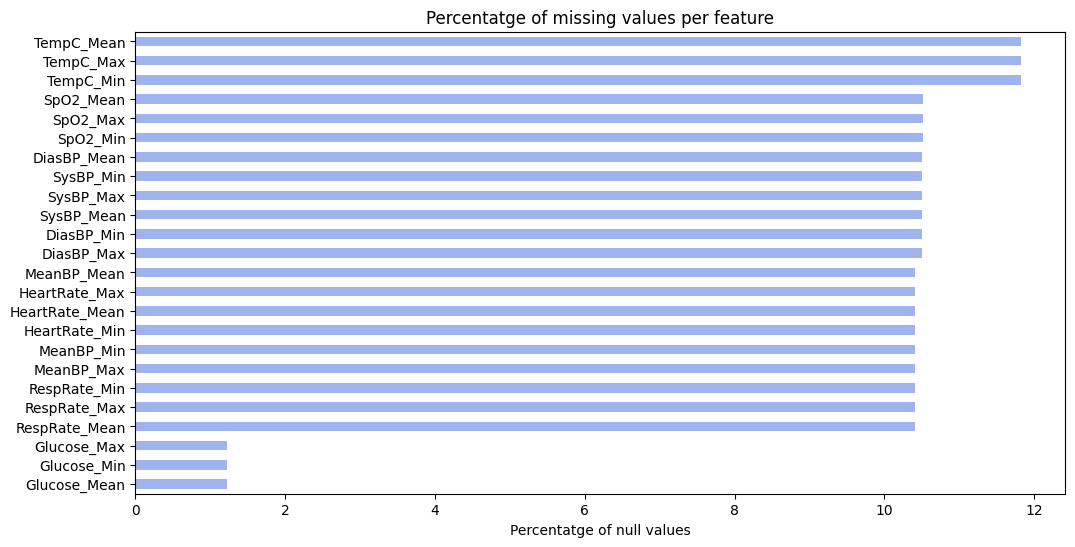

In [61]:
missing_percent = df_train.isnull().mean() * 100  # Calcula el porcentaje de nulos
missing_percent = missing_percent[missing_percent > 0].sort_values()

plt.figure(figsize=(12, 6))
missing_percent.plot(kind="barh", color="royalblue", alpha=0.5)
plt.xlabel("Percentatge of null values")
plt.title("Percentatge of missing values per feature")
plt.show()



The percentge of missing values is not incredebely high, with a maximum of a 12% in temperature related columns. Therefore this columns will be further imputed with a selected technique (mean).

## Distribution of the numerical features

As there are 24 features of medical indicators, to explore their distributions, a dictionary was created grouping them by category. 

In [62]:
# Group vital sign features by groups
indicators = {
    "Heart Rate & Respiratory Rate": ["HeartRate_Min", "HeartRate_Max", "HeartRate_Mean"],
    "Respiratory Rate":["RespRate_Min", "RespRate_Max", "RespRate_Mean"],
    "Blood Pressure": ["SysBP_Min", "SysBP_Max", "SysBP_Mean",
                       "DiasBP_Min", "DiasBP_Max", "DiasBP_Mean",
                       "MeanBP_Min", "MeanBP_Max", "MeanBP_Mean"],
    "Oxygen Saturation & Temperature": ["SpO2_Min", "SpO2_Max", "SpO2_Mean"],
    "Temperature":["TempC_Min", "TempC_Max", "TempC_Mean"],
    "Blood Glucose": ["Glucose_Min", "Glucose_Max", "Glucose_Mean"]
}

/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/4285387545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Variable",y="Value", data=df_melted, palette="Blues", ax=axes[i])
/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/4285387545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Variable",y="Value", data=df_melted, palette="Blues", ax=axes[i])
/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/4285387545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Variable",

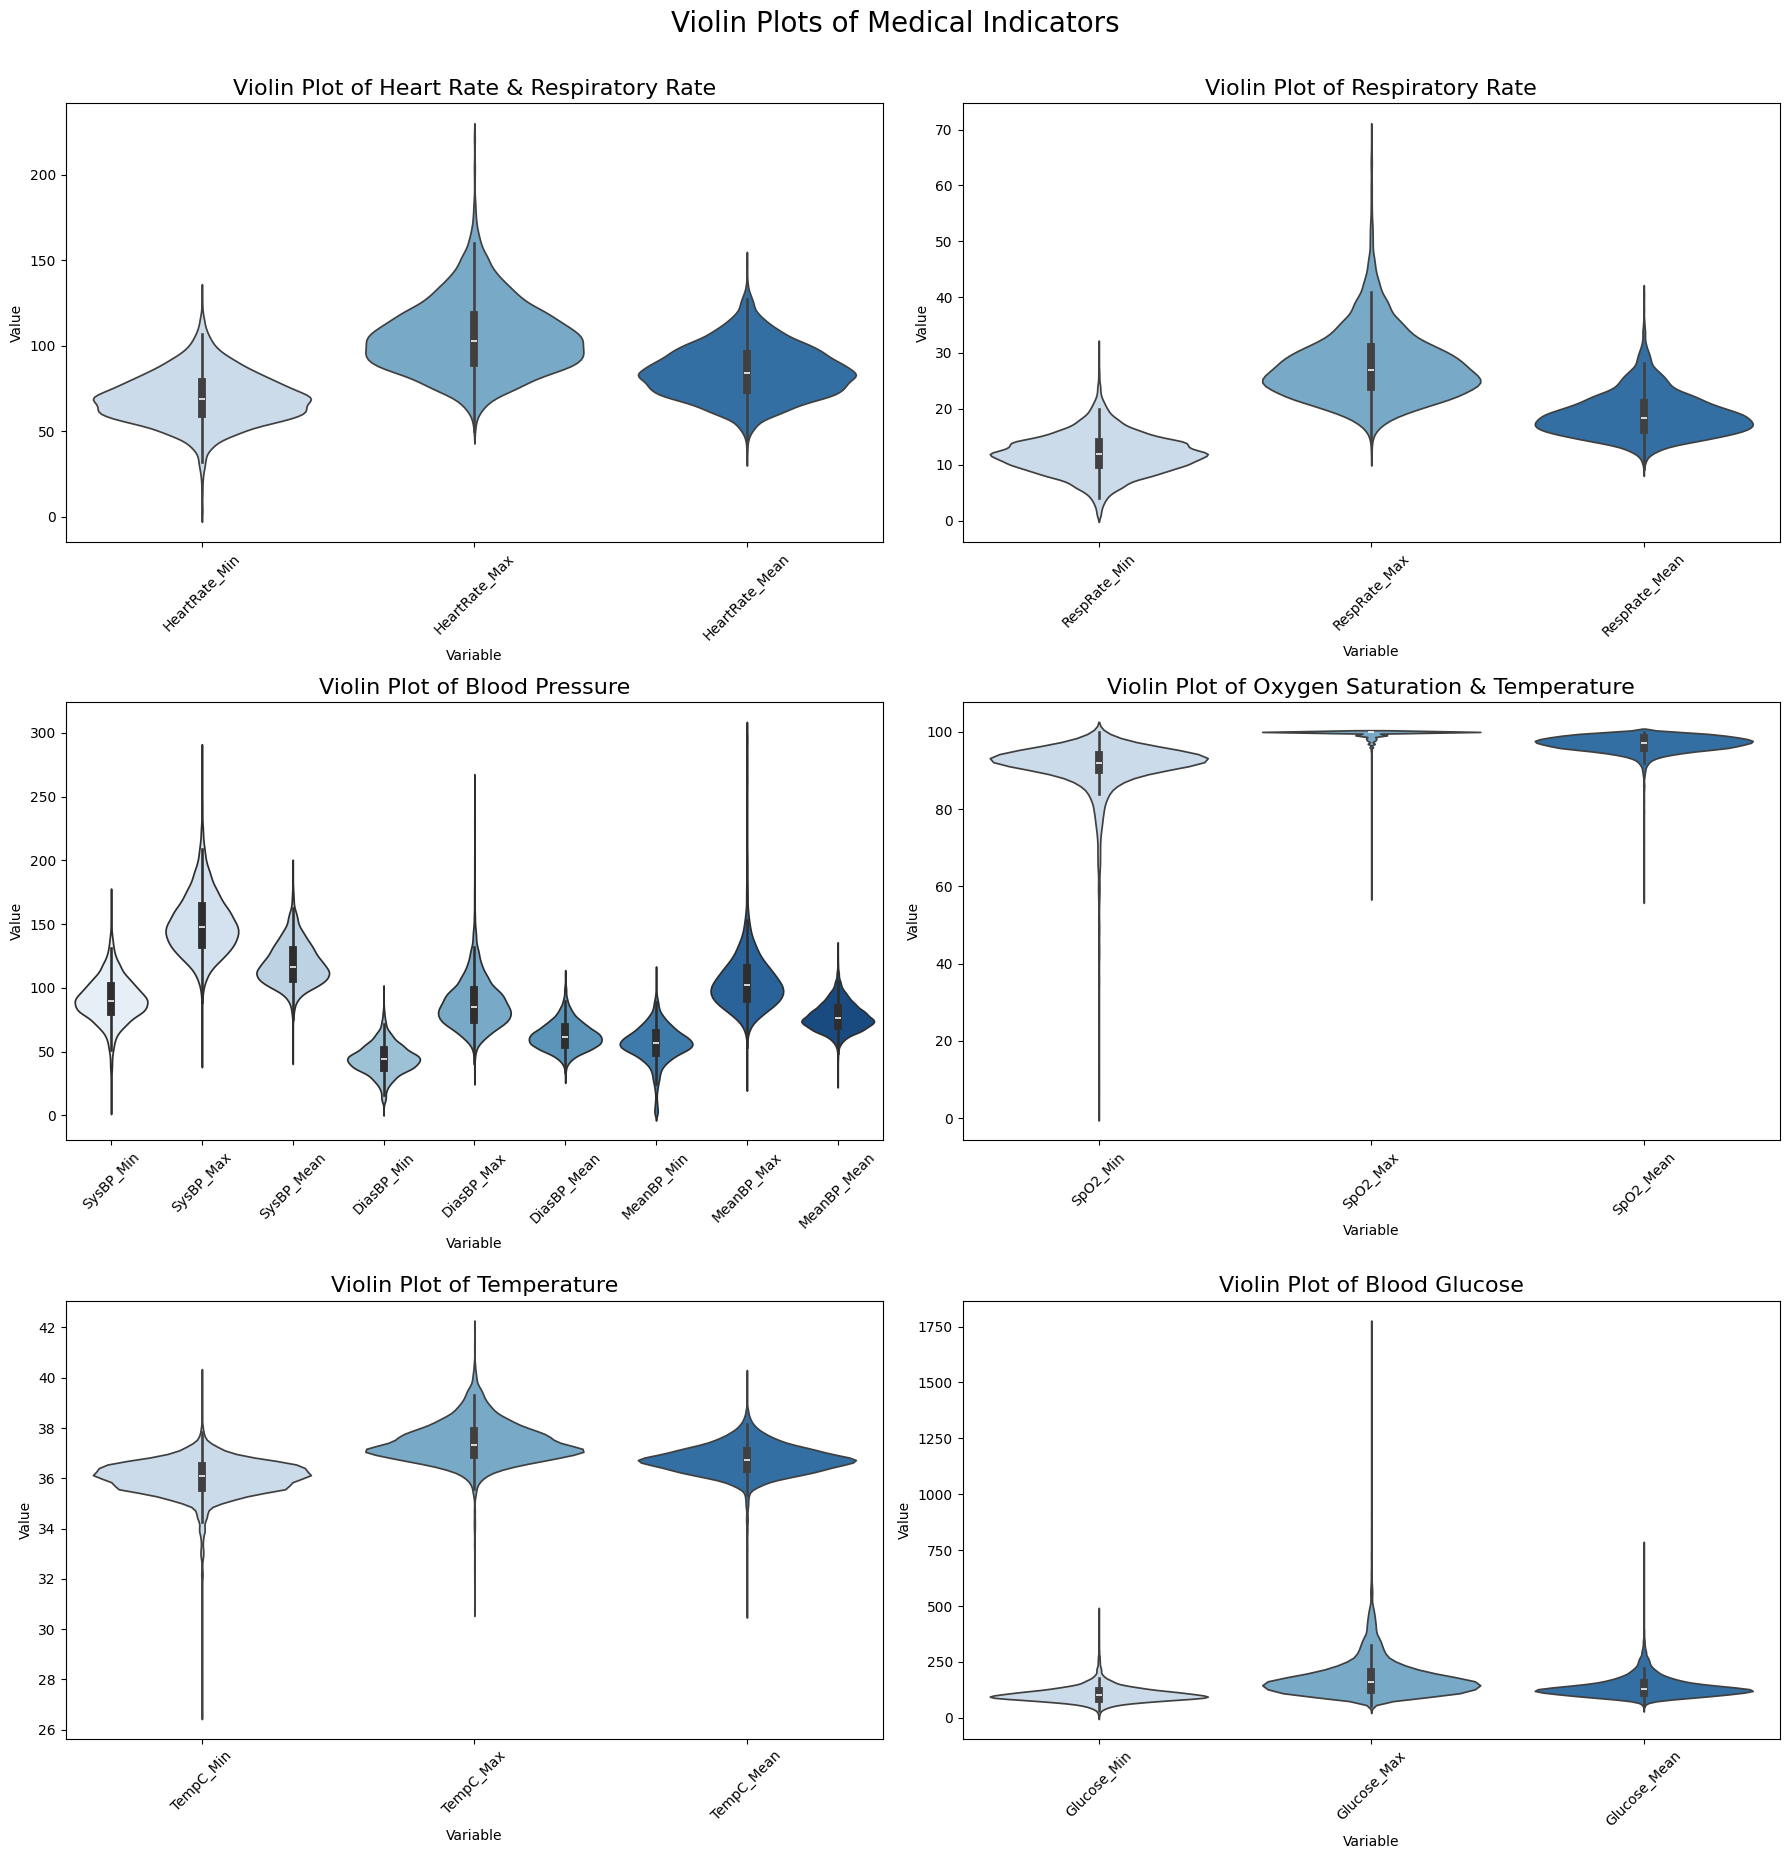

In [63]:
n_cols = 2  # graphs per row
n_rows = (len(indicators) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))
axes = axes.flatten()  

# violin plot
for i, (category, variables) in enumerate(indicators.items()):
    df_melted = df_train[variables].melt(var_name="Variable", value_name="Value")
    sns.violinplot(x="Variable",y="Value", data=df_melted, palette="Blues", ax=axes[i])
    axes[i].set_title(f"Violin Plot of {category}", fontsize=16)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of plots isn't even
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle("Violin Plots of Medical Indicators", fontsize=20, y=1.03)
plt.show()

For that violin plots were implemented: 
- **Heart rate** and **respiratory rate** indicators display relatively symmetric distributions, with heart rate values clustering around 100 bpm and respiratory rates mostly around 20 breaths per minute.
- **Blood pressure** plots show wider variability, especially for systolic measurements, suggesting significant differences in patient conditions.
- **Oxygen saturation** remains highly concentrated near 100%, indicating stable oxygen levels for most patients. 
- **Temperature** distributions are narrow and centered around normal body temperature, though some outliers suggest cases of fever or hypothermia. 
- **Blood glucose** levels exhibit the most significant skew, with a few extreme outliers indicating hyperglycemia, which could be critical in patient outcomes. 


Plotting the distributions of the mean values for these indicators, using histograms and kernel density lines, reveals similar patterns. These distributions further validate the trends observed in the violin plots, emphasizing both common patterns and significant outliers.

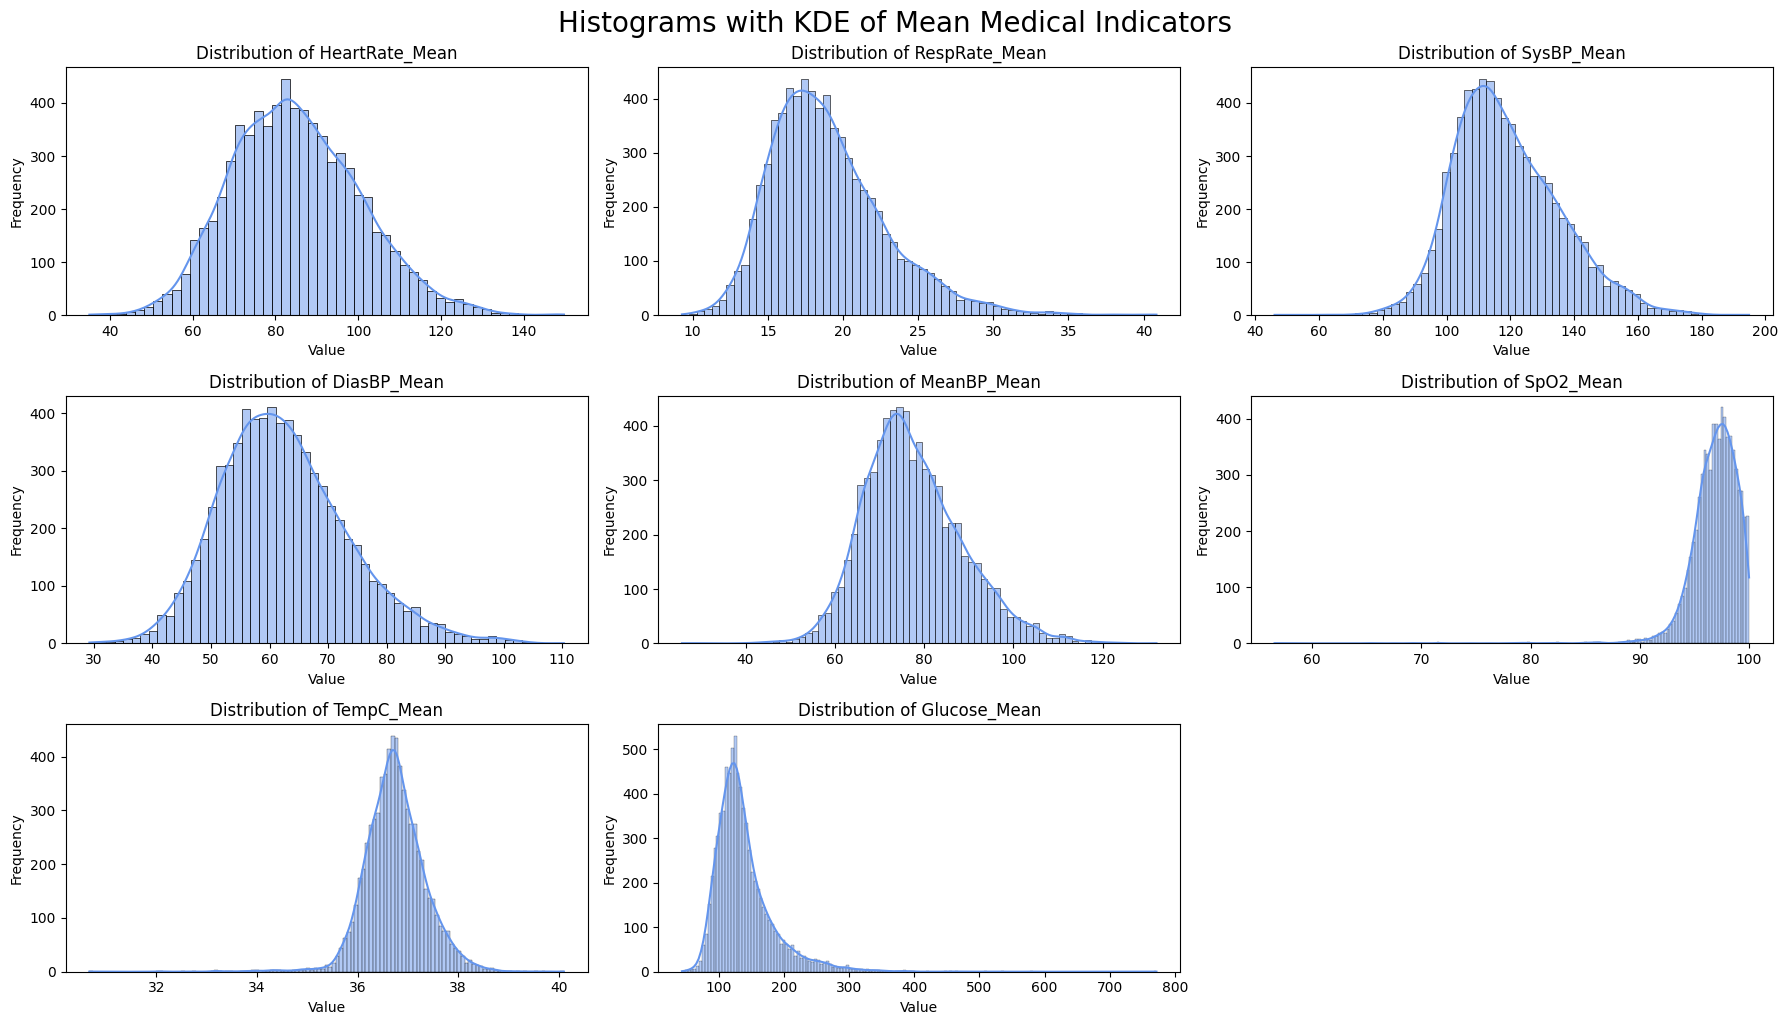

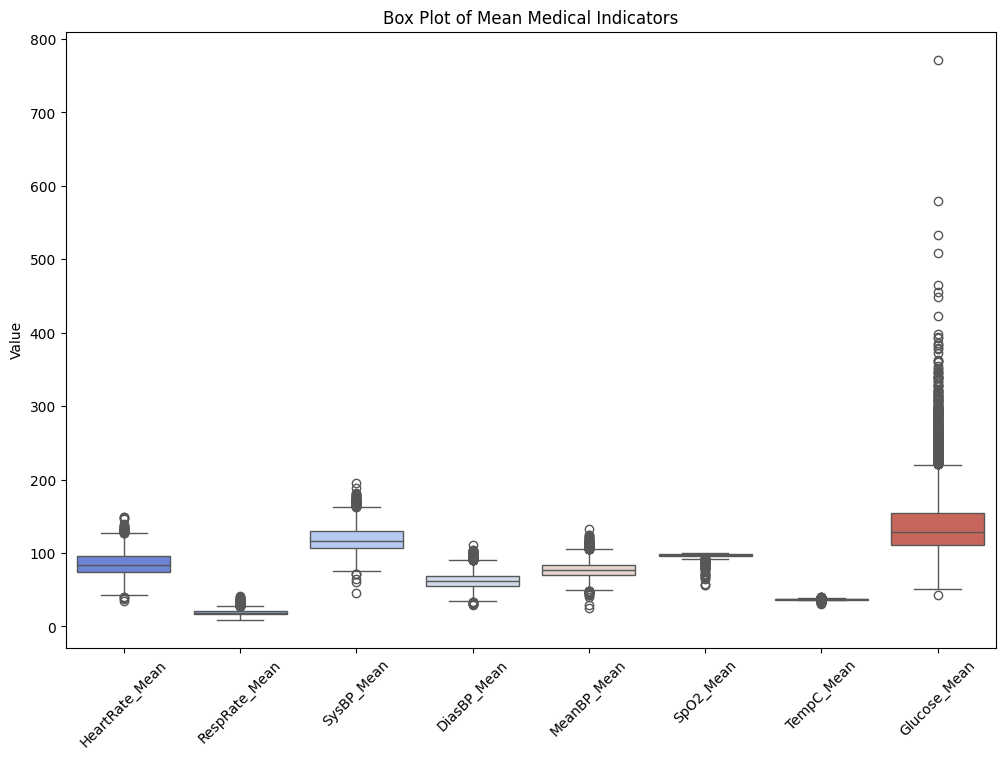

In [64]:
mean_variables=["HeartRate_Mean","RespRate_Mean","SysBP_Mean","DiasBP_Mean","MeanBP_Mean","SpO2_Mean","TempC_Mean","Glucose_Mean"]

# 1. Histogram with KDE
plt.figure(figsize=(18, 10))
for i, var in enumerate(mean_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[var], kde=True, color="cornflowerblue", alpha=0.5)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle("Histograms with KDE of Mean Medical Indicators", fontsize=20, y=1.02)
plt.show()

# 2. Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[mean_variables], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot of Mean Medical Indicators")
plt.ylabel("Value")
plt.show()

The boxplot provides a clearer visualization of outliers, with glucose levels standing out due to their much wider spread and numerous extreme values. This suggests that some patients experience significant glucose spikes, potentially indicating critical health issues.

### Distributions of the categorical variables

/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/66096177.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[var], palette=custom_palette, alpha=0.4, ax=axes[i])
/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/66096177.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=df_train[var], palette=custom_palette, alpha=0.4, ax=axes[i])
/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/66096177.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[var], palette=custom_palette, alpha=0.4, ax=axes[i])
/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykerne

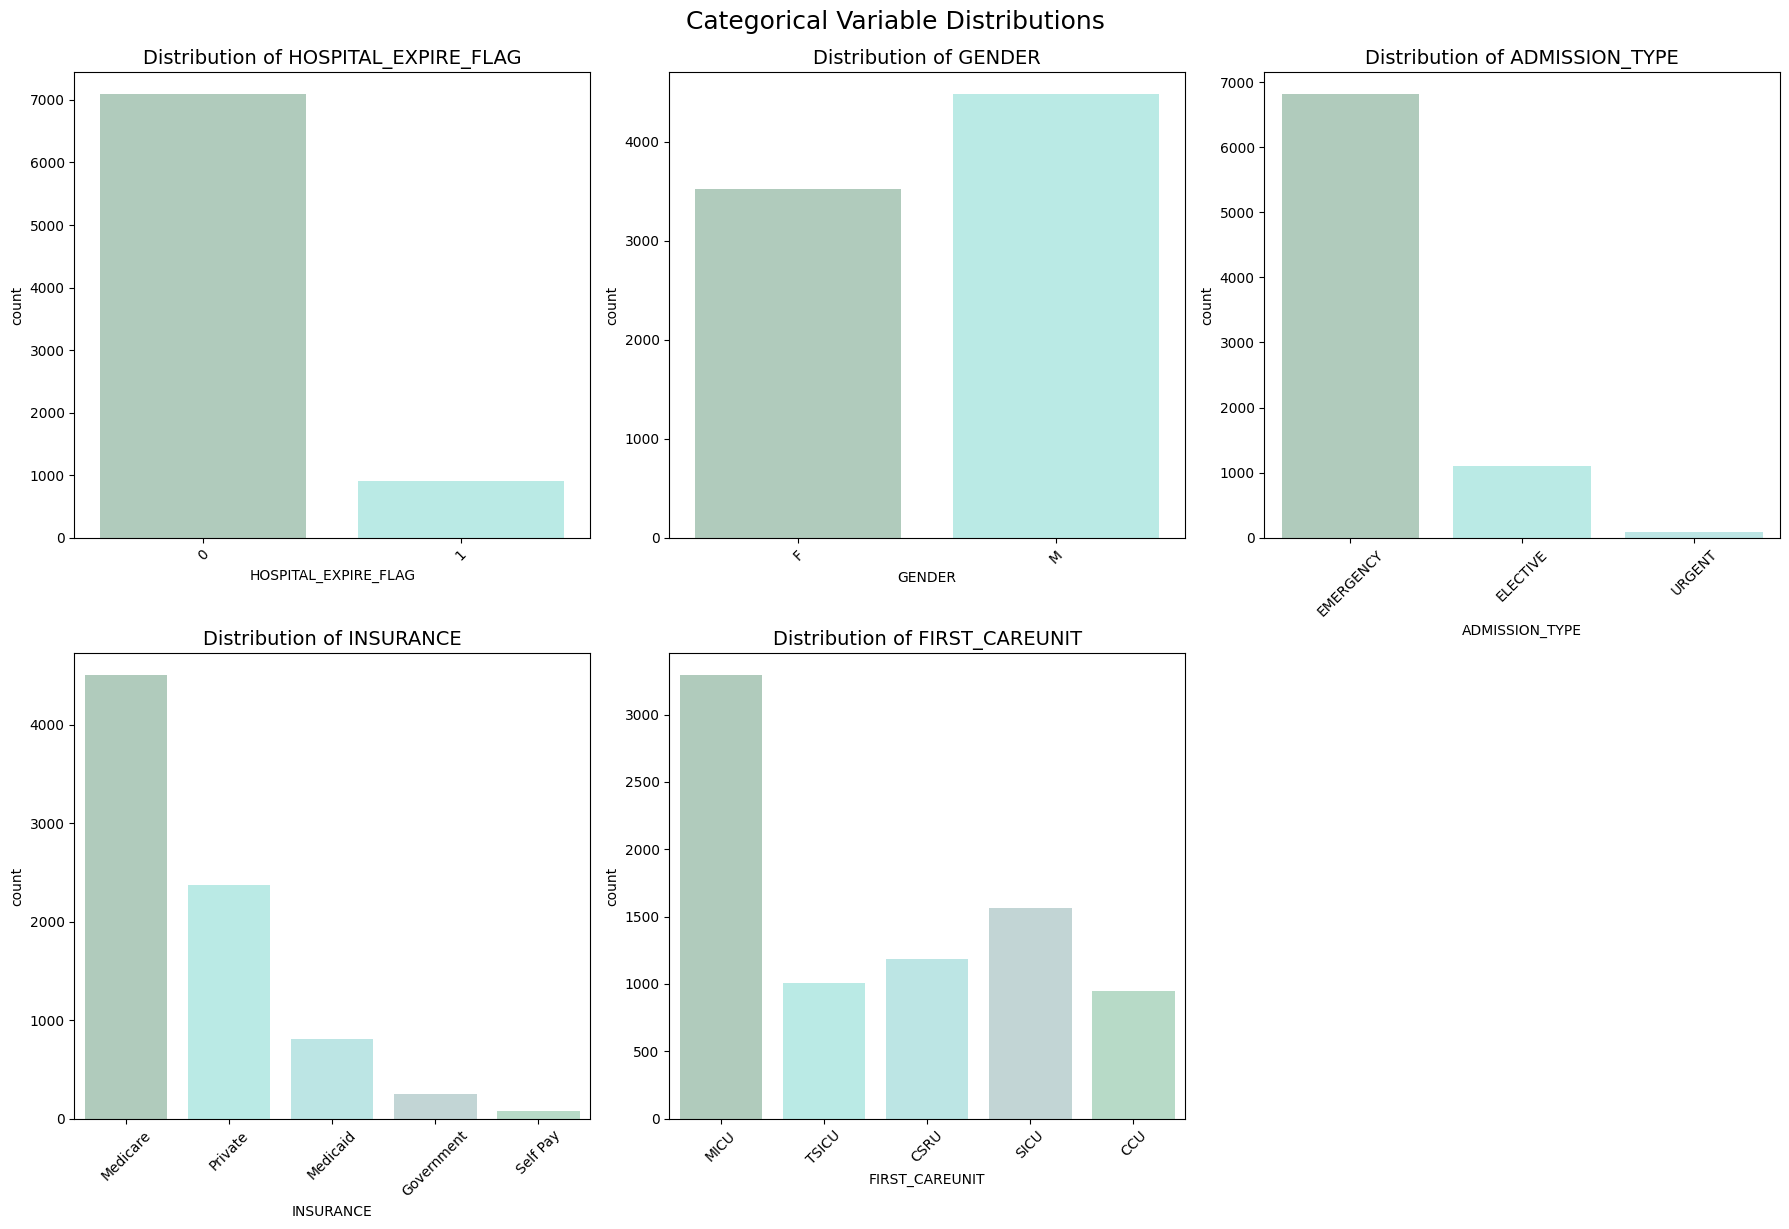

In [65]:
categorical_vars = ["HOSPITAL_EXPIRE_FLAG", "GENDER", "ADMISSION_TYPE", "INSURANCE", "FIRST_CAREUNIT"]
custom_palette = ["#2E8B57",
                  "#40E0D0",
                  "#48D1CC",# Sea Green
                  "#5F9EA0",  # Sea Green
                  "#3CB371",  # Medium Sea Green
                  "#66CDAA",  # Medium Aquamarine
                  "#20B2AA",  # Light Sea Green
                  "#5F9EA0",  # Cadet Blue,
]  # Medium Turquoise  # Turquoise

n_cols = 3
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols  # Automatically calculate rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make it easier to index

# Plot each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=df_train[var], palette=custom_palette, alpha=0.4, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)


# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.tight_layout()
plt.suptitle("Categorical Variable Distributions", fontsize=18, y=1.02)
plt.show()

Exploring the categorical variables distributions, allows to gather information about the patients characteristics. 

* `HOSPITAL_EXPIRE_FLAG`: shows that most patients survived their hospital stay, with a significantly smaller number of deaths.
* For `gender`, there is a slight predominance of male patients. 
* `ADMISSION_TYPE` distribution highlights that the majority of admissions were emergencies, indicating a high frequency of urgent and severe cases. 
* Regarding `INSURANCE`, most patients were covered by Medicare, followed by private insurance, suggesting a primarily older patient demographic. 
* Lastly, the `FIRST_CAREUNIT` distribution indicates that the MICU (Medical ICU) had the highest patient count, reflecting the critical condition of most patients upon admission. 

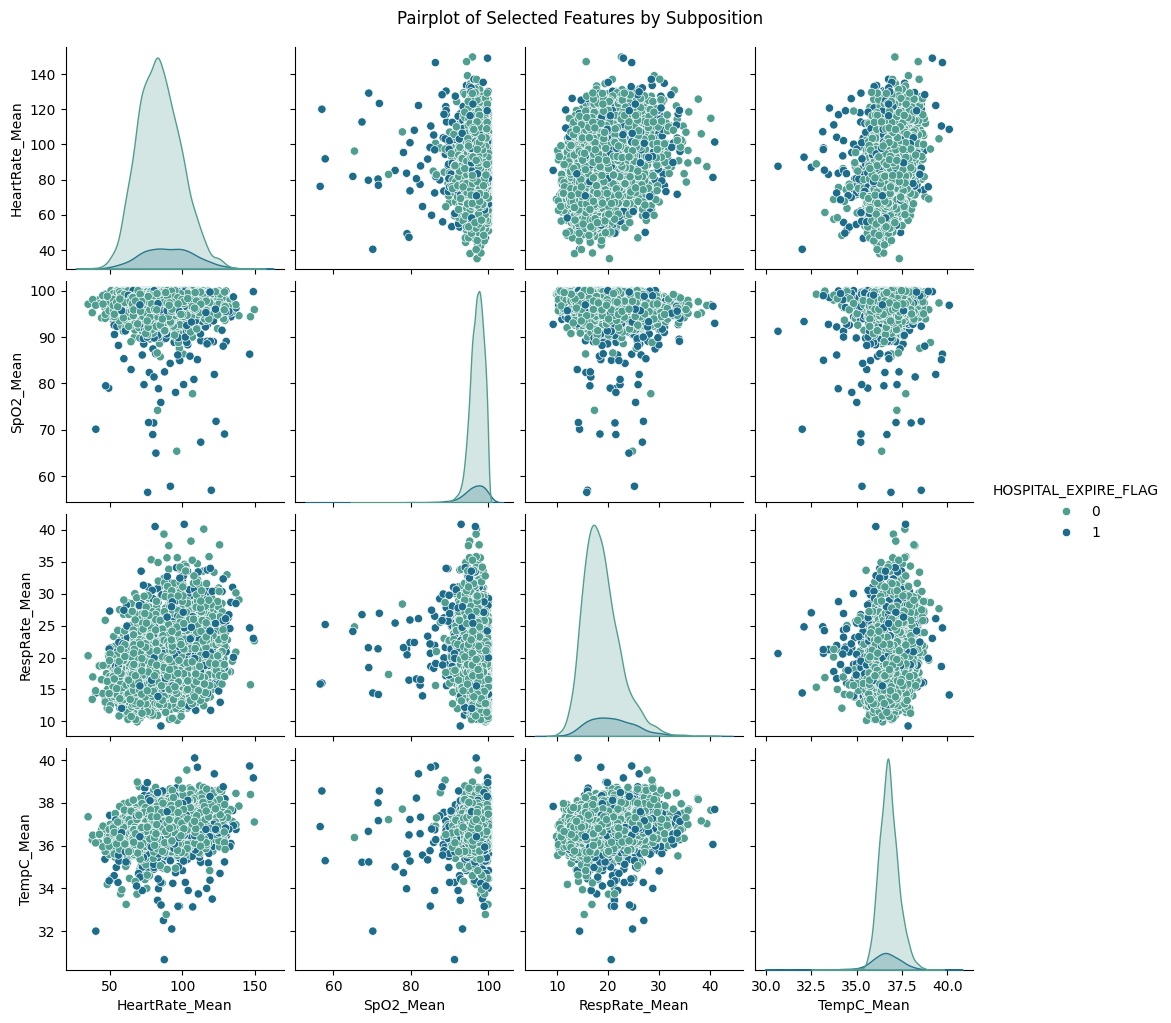

In [66]:
pairplot_features = ['HeartRate_Mean','SpO2_Mean','RespRate_Mean','TempC_Mean']
sns.pairplot(df_train[pairplot_features + ['HOSPITAL_EXPIRE_FLAG']], hue='HOSPITAL_EXPIRE_FLAG', palette='crest')
plt.suptitle('Pairplot of Selected Features by Subposition', y=1.02)
plt.show()

This pairplot provides a visual representation of the relationships between key mean medical indicators and their association with patient mortality (HOSPITAL_EXPIRE_FLAG). 

While no strong linear relationships are immediately evident between the variables, some patterns can be observed. 

* SpO2_Mean values show a slight trend where lower oxygen saturation levels appear more frequently in patients who did not survive (darker points). 

* Similarly, higher RespRate_Mean and HeartRate_Mean values show a slight increase in mortality, potentially indicating that extreme respiratory or heart rates are linked to worse outcomes. 

* Temperature and SpO2_Mean values remain mostly stable across survival outcomes, suggesting less variation in these indicators. 

Overall, while no clear-cut separations are observed, this plot hints that abnormal values in heart rate, respiratory rate, and oxygen levels could be associated with increased mortality risk.

# Feature engineering

Making sure features that provide the same information are encoded by the same name across the data frames.

In [67]:
df_train.rename(columns={'hadm_id': 'HADM_ID'}, inplace=True)
df_test.rename(columns={'hadm_id': 'HADM_ID'}, inplace=True)
df_train.rename(columns={'ICD9_diagnosis': 'ICD9_CODE'}, inplace=True)
df_test.rename(columns={'ICD9_diagnosis': 'ICD9_CODE'}, inplace=True)

df_test.head()

,HADM_ID,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,...,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,ADMITTIME,ADMISSION_TYPE,INSURANCE,ICD9_CODE,FIRST_CAREUNIT
0,195768,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,...,111.0,230.0,160.777778,F,2108-07-16 00:00:00,2178-02-06 10:35:00,EMERGENCY,Medicare,5789,MICU
1,126136,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,...,103.0,103.0,103.000000,F,2087-01-16 00:00:00,2129-02-12 22:34:00,EMERGENCY,Private,53013,MICU
2,136645,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,...,132.0,346.0,217.636364,F,2057-09-17 00:00:00,2125-11-17 23:04:00,EMERGENCY,Medicare,56983,MICU
3,102505,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,...,108.0,139.0,125.000000,F,2056-02-27 00:00:00,2131-01-26 08:00:00,ELECTIVE,Medicare,5533,SICU
4,127337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,137.0,113.000000,F,2066-12-19 00:00:00,2146-05-04 02:02:00,EMERGENCY,Medicare,56211,TSICU


New feature 'age' is created out of the time variables. By subtracting the admission date and date of birth. 

In [68]:
df_train['ADMITTIME']= pd.to_datetime(df_train['ADMITTIME']) #convert to datetime type
df_train['DOB'] =pd.to_datetime(df_train['DOB']) #convert to datetime type
df_train['age']=df_train['ADMITTIME'].dt.year-df_train['DOB'].dt.year #substract years from both dates
df_train=df_train.drop(['ADMITTIME','DOB'],axis=1) #drop both columns

#same process for test dataset
df_test['ADMITTIME']= pd.to_datetime(df_test['ADMITTIME'])
df_test['DOB'] =pd.to_datetime(df_test['DOB'])
df_test['age']=df_test['ADMITTIME'].dt.year-df_test['DOB'].dt.year
df_test=df_test.drop(['ADMITTIME','DOB'],axis=1)


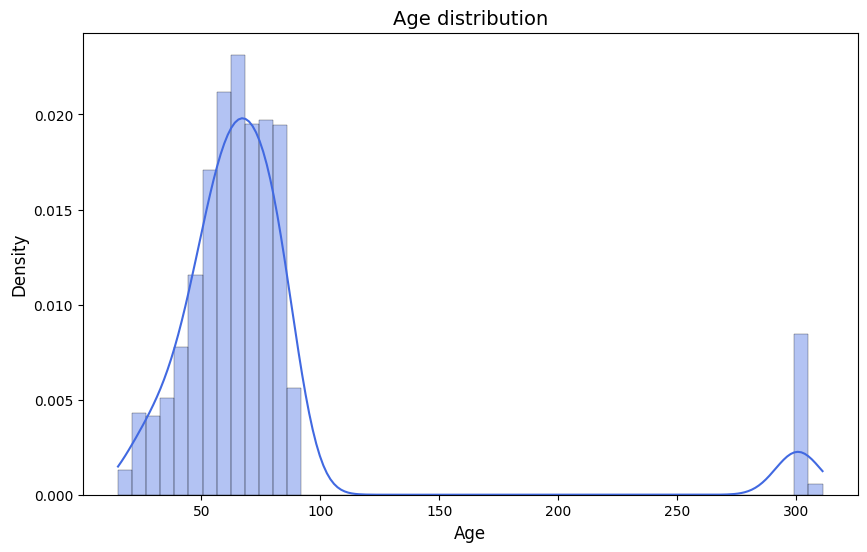

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], kde=True, bins=50, color="royalblue", alpha= 0.4, stat='density', linewidth=0.2)
plt.title('Age distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

From 'https://www.nature.com/articles/sdata201635' was found that patients over the age of 89 were shifted towards values over 300 for privacy reasons. But we can transform those values back to that range. 

In [70]:
df_train['age'][df_train['age']>89].value_counts()

age
300    339
301     25
302     19
303      9
307      9
306      8
305      5
308      4
304      4
310      2
309      2
311      1
Name: count, dtype: int64

Subtracting 210 from the values, to get their approximate age:

In [71]:
df_train.loc[df_train['age'] > 299, 'age'] = df_train.loc[df_train['age'] > 299, 'age'] - 210
df_test.loc[df_test['age'] > 299, 'age'] = df_test.loc[df_test['age'] > 299, 'age'] - 210

Plotting the new distribution

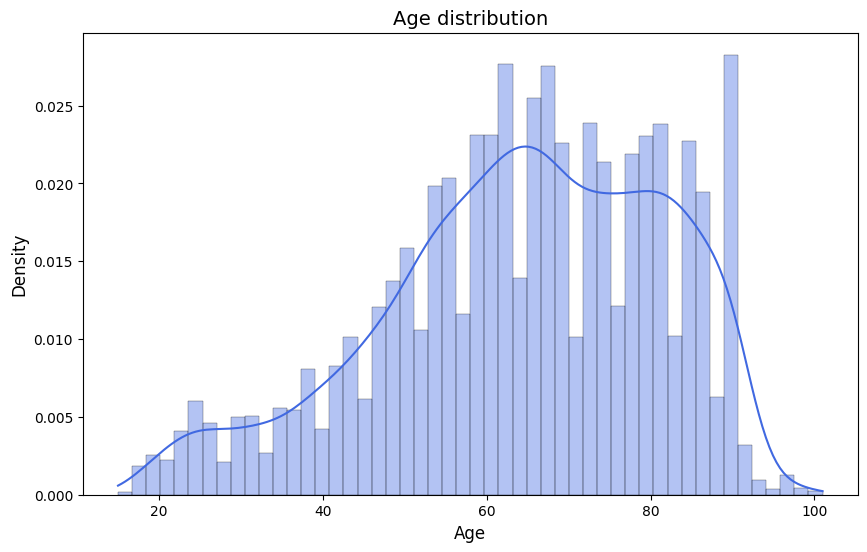

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], kde=True, bins=50, color="royalblue", alpha= 0.4, stat='density', linewidth=0.2)
plt.title('Age distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

## Target Encoding 

In [73]:
unique_diagnosis_codes = df_train['ICD9_CODE'].unique()

# Mostrar el número total de valores únicos y los primeros 10 valores para tener una idea
print(f"Number of unique diagnosis: {len(unique_diagnosis_codes)}")

Number of unique diagnosis: 1247


Due to the high amount of different diagnosis, computing one hot encoding on all of them would translate in too many new categories of variables, which likely would only introduce disturbances. 

For that reason **target encoding** will be applied to the diagnoses. Each diagnosis instead of a code, will be replaced by a probability. Based on the amount of patiens who died  with a number based on how often patients with that diagnosis died in the training set. This helps the model learn how likely a patient is to die based on their diagnosis.

In [74]:
unique_diagnosis_codes = df_test['ICD9_CODE'].unique()

# Mostrar el número total de valores únicos y los primeros 10 valores para tener una idea
print(f"Number of unique diagnosis: {len(unique_diagnosis_codes)}")

Number of unique diagnosis: 1547


However it can be seen that the test file accounts for more different diagnosis. To handle this, we assign these new diagnoses a value based on the closest similar code,  assuming that similar codes (alphanumerically) refer to related diseases.

Merging the train and diagnoses datasets. This way, we can gain a more complete picture of the health condition of the patients who passed away.

In [75]:
hadm_train=df_train[['HADM_ID','HOSPITAL_EXPIRE_FLAG']] #select the HAMD_ID and the label

hadm_diagnosis = pd.merge(hadm_train, df_diagnoses, on='HADM_ID', how='inner') #merge both datasets so we get the label and all diagnosis for each stay
hadm_diagnosis.head()

,HADM_ID,HOSPITAL_EXPIRE_FLAG,ICD9_CODE
0,151200,0,49121
1,151200,0,51884
2,151200,0,42823
3,151200,0,4254
4,151200,0,2639


The target encoding value is calculated as the average of the deaths for each diagnostic:

$$
TE = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

Where:

- $TE$ → Target encoding value for a specific diagnosis.
- $n$ → Total number of patients with that diagnosis.
- $y_i$ → Number of patients who died with that diagnosis. 

Using the module 'category encoders', we get an average value of a patient dying given a specific diagnosis. 

In [76]:
encoder = ce.TargetEncoder(cols=['ICD9_CODE']) # Diagnosis code is encoded
hadm_diagnosis['ICD9_encoded'] = encoder.fit_transform(hadm_diagnosis['ICD9_CODE'], hadm_diagnosis['HOSPITAL_EXPIRE_FLAG'])

 # encoded diagnosis df is created which gives the encoding for each diagnosis
encoded_diagnosis=hadm_diagnosis[['ICD9_CODE','ICD9_encoded']].groupby('ICD9_CODE').mean()
encoded_diagnosis.sort_values('ICD9_encoded')

,ICD9_encoded
ICD9_CODE,
30981,0.001916
78057,0.015611
27803,0.017058
4111,0.017964
V173,0.018032
...,...
3484,0.461538
2866,0.493333
78001,0.547706


If a patient has multiple diagnoses during a single hospital admission, this code selects the diagnosis with the **highest association to mortality**. By retaining only this diagnosis for analysis, the dataset is simplified, allowing the focus to remain on the most critical factor.

Additionally we will count the amount of deseases each patient has, and create a comorbidities column with the total value. 

In [77]:
# Count the number of distinct ICD9_CODE for each HADM_ID to represent comorbidities
comorbidities = hadm_diagnosis.groupby('HADM_ID')['ICD9_CODE'].nunique().reset_index()
comorbidities['comorbidities'] = comorbidities['ICD9_CODE']

# Merge with original dataframe
hadm_diagnosis = pd.merge(hadm_diagnosis, comorbidities[['HADM_ID', 'comorbidities']], on='HADM_ID', how='left')
hadm_diagnosis.head()

,HADM_ID,HOSPITAL_EXPIRE_FLAG,ICD9_CODE,ICD9_encoded,comorbidities
0,151200,0,49121,0.117647,28
1,151200,0,51884,0.254871,28
2,151200,0,42823,0.125714,28
3,151200,0,4254,0.114650,28
4,151200,0,2639,0.169550,28


In [78]:
# Find the highest of the maximum encoding value for each patient
max_values = hadm_diagnosis.groupby('HADM_ID')['ICD9_encoded'].idxmax()

# Select rows with max indices
hadm_diagnosis_train = hadm_diagnosis.loc[max_values]
hadm_diagnosis_train.head()

,HADM_ID,HOSPITAL_EXPIRE_FLAG,ICD9_CODE,ICD9_encoded,comorbidities
103896,100001,0,5780,0.237267,16
31924,100009,0,4148,0.174194,18
35142,100012,0,V8741,0.222973,11
102312,100018,0,70723,0.239229,29
91762,100020,0,5601,0.188525,18


Merging the encoded values with the training set

In [79]:

train_encoded = pd.merge(df_train, hadm_diagnosis_train[['HADM_ID','ICD9_encoded','comorbidities']], on='HADM_ID', how='inner')
train_encoded.head()


,HOSPITAL_EXPIRE_FLAG,HADM_ID,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,...,Glucose_Max,Glucose_Mean,GENDER,ADMISSION_TYPE,INSURANCE,ICD9_CODE,FIRST_CAREUNIT,age,ICD9_encoded,comorbidities
0,0,151200,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,...,200.0,155.000000,F,EMERGENCY,Medicare,49121,MICU,63,0.254871,28
1,0,140114,74.0,114.0,92.204082,87.0,160.0,122.000000,35.0,75.0,...,213.0,187.000000,F,EMERGENCY,Private,80620,TSICU,62,0.298749,9
2,0,118589,59.0,89.0,70.581395,88.0,160.0,120.933333,43.0,70.0,...,113.0,88.333333,M,EMERGENCY,Medicare,99859,CSRU,73,0.162858,10
3,1,125553,75.0,86.0,80.400000,74.0,102.0,85.227273,47.0,69.0,...,68.0,68.000000,M,EMERGENCY,Private,27652,MICU,62,0.336058,11
4,0,181409,77.0,107.0,91.020408,95.0,150.0,108.625000,39.0,132.0,...,117.0,92.666667,M,EMERGENCY,Medicaid,9974,MICU,62,0.359929,24


Using the encoded values from the training set, we can now assign encoding to new diagnoses in the test set, following the previously described strategy.

In [80]:
hadm_diagnosis_test = pd.merge(df_test['HADM_ID'], df_diagnoses, on='HADM_ID', how='inner') #merge both datasets so we get the label and all diagnosis for each stay

hadm_diagnosis_test = pd.merge(hadm_diagnosis_test, encoded_diagnosis, on='ICD9_CODE', how='left')
hadm_diagnosis_test=hadm_diagnosis_test.sort_values('ICD9_CODE')
hadm_diagnosis_test['ICD9_encoded'] = hadm_diagnosis_test['ICD9_encoded'].fillna(method='ffill')
hadm_diagnosis_test['comorbidities'] = hadm_diagnosis_test.groupby('HADM_ID')['ICD9_CODE'].transform('count')
max_values = hadm_diagnosis_test.groupby('HADM_ID')['ICD9_encoded'].idxmax()

# Select rows with these indices
hadm_diagnosis_test = hadm_diagnosis_test.loc[max_values]

test_encoded = pd.merge(df_test, hadm_diagnosis_test[['HADM_ID','ICD9_encoded','comorbidities']], on='HADM_ID', how='inner')
test_encoded.head()

/var/folders/06/b6hq4_md0n50pkq6_5j8l7yc0000gn/T/ipykernel_20935/1517934971.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hadm_diagnosis_test['ICD9_encoded'] = hadm_diagnosis_test['ICD9_encoded'].fillna(method='ffill')


,HADM_ID,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,...,Glucose_Max,Glucose_Mean,GENDER,ADMISSION_TYPE,INSURANCE,ICD9_CODE,FIRST_CAREUNIT,age,ICD9_encoded,comorbidities
0,195768,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,...,230.0,160.777778,F,EMERGENCY,Medicare,5789,MICU,70,0.298749,17
1,126136,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,...,103.0,103.000000,F,EMERGENCY,Private,53013,MICU,42,0.147760,3
2,136645,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,...,346.0,217.636364,F,EMERGENCY,Medicare,56983,MICU,68,0.297304,14
3,102505,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,...,139.0,125.000000,F,ELECTIVE,Medicare,5533,SICU,75,0.187058,15
4,127337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137.0,113.000000,F,EMERGENCY,Medicare,56211,TSICU,80,0.209083,16


In [81]:
# Dropping the variables that are not needed anymore
train_encoded=train_encoded.drop(['HADM_ID','ICD9_CODE'], axis=1)
test_encoded=test_encoded.drop(['HADM_ID','ICD9_CODE'], axis=1)
test_encoded.head()

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,ADMISSION_TYPE,INSURANCE,FIRST_CAREUNIT,age,ICD9_encoded,comorbidities
0,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,...,111.0,230.0,160.777778,F,EMERGENCY,Medicare,MICU,70,0.298749,17
1,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,58.0,...,103.0,103.0,103.000000,F,EMERGENCY,Private,MICU,42,0.147760,3
2,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,64.0,...,132.0,346.0,217.636364,F,EMERGENCY,Medicare,MICU,68,0.297304,14
3,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,48.0,...,108.0,139.0,125.000000,F,ELECTIVE,Medicare,SICU,75,0.187058,15
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,137.0,113.000000,F,EMERGENCY,Medicare,TSICU,80,0.209083,16


# Managing Categorical Variables

In [82]:
train_encoded = pd.get_dummies(train_encoded,columns=['GENDER','ADMISSION_TYPE','INSURANCE','FIRST_CAREUNIT'],drop_first=True)
test_encoded = pd.get_dummies(test_encoded,columns=['GENDER','ADMISSION_TYPE','INSURANCE','FIRST_CAREUNIT'],drop_first=True)
train_encoded.head()
print(train_encoded.shape)
print(test_encoded.shape)

(8000, 39)
(12885, 38)


Labels of the training set are separated, but saved for further comparison. 

In [83]:
labels=train_encoded['HOSPITAL_EXPIRE_FLAG']
train_encoded=train_encoded.drop(['HOSPITAL_EXPIRE_FLAG'],axis=1)

# Filling missing values

In [84]:
# Total null values per feature
Nulls = train_encoded.isnull().sum()
print(Nulls)

HeartRate_Min               833
HeartRate_Max               833
HeartRate_Mean              833
SysBP_Min                   840
SysBP_Max                   840
SysBP_Mean                  840
DiasBP_Min                  840
DiasBP_Max                  840
DiasBP_Mean                 840
MeanBP_Min                  833
MeanBP_Max                  833
MeanBP_Mean                 833
RespRate_Min                833
RespRate_Max                833
RespRate_Mean               833
TempC_Min                   946
TempC_Max                   946
TempC_Mean                  946
SpO2_Min                    841
SpO2_Max                    841
SpO2_Mean                   841
Glucose_Min                  98
Glucose_Max                  98
Glucose_Mean                 98
age                           0
ICD9_encoded                  0
comorbidities                 0
GENDER_M                      0
ADMISSION_TYPE_EMERGENCY      0
ADMISSION_TYPE_URGENT         0
INSURANCE_Medicaid            0
INSURANC

As described in the EDA part, the percentatge of missing values per column is not significantly high, therefore those will be imputed using the median value as it is more robust than the mean.  

In [85]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

In [86]:
train_final = pd.DataFrame(imputer.fit_transform(train_encoded),columns=train_encoded.columns)
test_final = pd.DataFrame(imputer.transform(test_encoded),columns=test_encoded.columns)
train_final.head()

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU
0,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,74.0,114.0,92.204082,87.0,160.0,122.000000,35.0,75.0,53.020000,16.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,59.0,89.0,70.581395,88.0,160.0,120.933333,43.0,70.0,51.688889,55.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,75.0,86.0,80.400000,74.0,102.0,85.227273,47.0,69.0,59.636364,54.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,77.0,107.0,91.020408,95.0,150.0,108.625000,39.0,132.0,57.500000,56.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
# Compute nulls per feature
Nulls = train_final.isnull().sum()
print(Nulls)

HeartRate_Min               0
HeartRate_Max               0
HeartRate_Mean              0
SysBP_Min                   0
SysBP_Max                   0
SysBP_Mean                  0
DiasBP_Min                  0
DiasBP_Max                  0
DiasBP_Mean                 0
MeanBP_Min                  0
MeanBP_Max                  0
MeanBP_Mean                 0
RespRate_Min                0
RespRate_Max                0
RespRate_Mean               0
TempC_Min                   0
TempC_Max                   0
TempC_Mean                  0
SpO2_Min                    0
SpO2_Max                    0
SpO2_Mean                   0
Glucose_Min                 0
Glucose_Max                 0
Glucose_Mean                0
age                         0
ICD9_encoded                0
comorbidities               0
GENDER_M                    0
ADMISSION_TYPE_EMERGENCY    0
ADMISSION_TYPE_URGENT       0
INSURANCE_Medicaid          0
INSURANCE_Medicare          0
INSURANCE_Private           0
INSURANCE_

# Data Scaling

Having features in different scales, can negatively affect the performance of the model. For example, heart rate might range from 40 to 150, while age could range from 0 to 100. If the data isn’t scaled, features with larger values might dominate the learning process, leading to biased results. StandardScaler standardizes the data by transforming it to have a mean of 0 and a standard deviation of 1. This helps algorithms that are sensitive to the scale of data, like K-Nearest Neighbors or Support Vector Machines, to perform better and converge faster.

In [88]:
# Rescale data inputs
scaler = preprocessing.StandardScaler()

In [89]:
scaler.fit(train_final)

StandardScaler()

The scaling the training and test datasets

In [90]:
training_scl = scaler.transform(train_final)
test_scl = scaler.transform(test_final)

# Prediction models

Splitting the training set in order to check how accurate our model performs

Grid Search tests the possible combinations of hyperparameters such as: 
- n_neighbors: Sets how many nearby points the model looks at to make a prediction.
- metric: Decides how the model measures the distance between points.
    - uniform: gives equal weights
    - distant: gives mores importance to the points that are closer. 
- weights: Controls whether closer points have more influence than farther ones.

And along with cross-validation, it ensures the model performs well across different data splits, selecting the combination that achieves the highest predictive accuracy.

## Ensemble models

In [91]:
X_train, X_test, y_train, y_test = train_test_split(training_scl, labels, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

param_grids = {
    "KNN": {'n_neighbors': [401, 451, 501], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

best_models = {}
for name, model in models.items():
    print(f"Entrenando {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Mejor modelo para {name}: {grid_search.best_params_}")

model_scores = {}
for name, model in best_models.items():
    y_pred = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred)
    model_scores[name] = score
    print(f"{name} - AUC: {score:.4f}")

top_models = sorted(model_scores, key=model_scores.get, reverse=True)[:2]

ensemble = VotingClassifier(
    estimators=[(top_models[0], best_models[top_models[0]]), (top_models[1], best_models[top_models[1]])],
    voting='soft'
)

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict_proba(X_test)[:, 1]
ensemble_score = roc_auc_score(y_test, y_pred_ensemble)

print(f"\n Ensemble ({top_models[0]} + {top_models[1]}) - AUC: {ensemble_score:.4f}")



Entrenando KNN...


Mejor modelo para KNN: {'metric': 'euclidean', 'n_neighbors': 501, 'weights': 'distance'}
Entrenando Random Forest...
Mejor modelo para Random Forest: {'max_depth': 10, 'n_estimators': 300}
Entrenando SVM...
Mejor modelo para SVM: {'C': 0.1, 'kernel': 'linear'}
Entrenando Gradient Boosting...
Mejor modelo para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
KNN - AUC: 0.8910
Random Forest - AUC: 0.9133
SVM - AUC: 0.9150
Gradient Boosting - AUC: 0.9214

 Ensemble (Gradient Boosting + SVM) - AUC: 0.9220


AUC:  0.9219520580651324


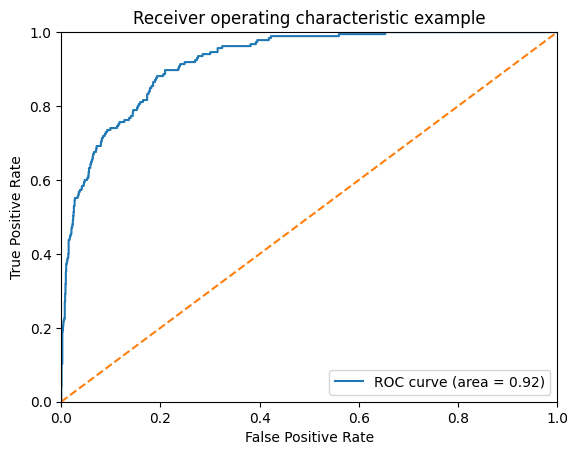

In [92]:
outsample_pred = ensemble.predict_proba(X_test)

get_auc(y_test, outsample_pred, ['Survive','Dead'], column=1, plot=True)

The resulting AUC is **0.92**, which indicates that the model performs well on unseen data.

## Individual models

In [93]:
# SVM model and hyperparameters
svm_model = SVC(probability=True)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

svm_grid = GridSearchCV(svm_model, svm_param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)

best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, y_pred_svm)
print(f"SVM - AUC: {svm_auc:.4f}")


SVM - AUC: 0.9150


In [94]:
# Gradient Boosting 
gbm_model = GradientBoostingClassifier()
gbm_param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

# Train GBM with GridSearchCV
gbm_grid = GridSearchCV(gbm_model, gbm_param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
gbm_grid.fit(X_train, y_train)

# Evaluate GBM
best_gbm = gbm_grid.best_estimator_
y_pred_gbm = best_gbm.predict_proba(X_test)[:, 1]
gbm_auc = roc_auc_score(y_test, y_pred_gbm)
print(f"Gradient Boosting - AUC: {gbm_auc:.4f}")


Gradient Boosting - AUC: 0.9222


In [95]:
# Define CatBoost 
catboost_model = CatBoostClassifier(verbose=0)
catboost_param_grid = {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [3, 5]}

catboost_grid = GridSearchCV(catboost_model, catboost_param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
catboost_grid.fit(X_train, y_train)

best_catboost = catboost_grid.best_estimator_
y_pred_catboost = best_catboost.predict_proba(X_test)[:, 1]
catboost_auc = roc_auc_score(y_test, y_pred_catboost)
print(f"CatBoost - AUC: {catboost_auc:.4f}")


CatBoost - AUC: 0.9229


After running ensembling and separate models, finally the best prediction was obtained by using Catboost Classifier. Even though all AUC are quite close to each other and only differ slightly. 

**CatBoost** is especially useful whenever a model has many categorical variables as it does not need preprocessing. In our case this didn't make a difference as the model was already applied to numerical preprocessed feature, but overall it performed a bit better than the others, and for that it was chosen for the final kaggle submission. 

Additionally it implements ordered boosting to reduce prediction shift (worse performance on unseen data) and overfitting.

Recovering the initially saved ID, to be able to submit the kaggle prediction

In [96]:
ids = ids.to_frame(name="icustay_id")
ids.head()

,icustay_id
0,228357
1,221004
2,296315
3,245557
4,225281


In [97]:
probability=best_catboost.predict_proba(test_scl)
test_predictions_submit=pd.DataFrame({"icustay_id":ids['icustay_id'],"HOSPITAL_EXPIRE_FLAG":probability[:,1]})
test_predictions_submit.to_csv("submision.csv", index=False)

After submitting the reults in the Kaggle competition the accuray obtained is close to **91 %** which indicates that the algorithm is able to make good predictions on the test dataset.